# 1 DATA WRANGLING

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Import Data
file_name='data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 22 columns]

In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Get Null Values

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

bedrooms     13
bathrooms    10
dtype: int64

## Drop and Replace Null Values

In [5]:
### Drop Null-values, axis=0 are rows
dropped_null_rows = df
dropped_null_rows.dropna(subset=['bedrooms', 'bathrooms'], axis=0, inplace=True)

### Replace Null-values by mean()
mean_bed = df['bedrooms'].mean()
mean_bath = df['bathrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bed, inplace=True)
df['bathrooms'].replace(np.nan, mean_bath, inplace=True)

## Drop Columns

In [6]:
### make sure to set inplace=True, axis=1 are columns
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

## Convert Columns

In [7]:
### Add Calculation
df['sqft_living'] = df['sqft_living']*0.092903
df.rename(columns={'sqft_living': 'sqmt_living'}, inplace=True)

## Change dtype of Column

In [8]:
### Change DataType
print('dtype now:', df['sqmt_living'].dtype)
df['int_sqmt_living'] = df['sqmt_living'].astype('int32')
print('dtype after conversion:', df['int_sqmt_living'].dtype)

dtype now: float64
dtype after conversion: int32


## Binning of Values

In [9]:
bins = np.linspace(min(df['price']), max(df['price']), 4) # create 3 bins
group_names = ['low', 'medium', 'high']
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)
df[['price', 'price-binned']].head()

price price-binned
0  221900.0          low
1  538000.0          low
2  180000.0          low
3  604000.0          low
4  510000.0          low

        price-binned
low            21515
medium            76
high               6


Text(0.5, 1.0, 'price bins')

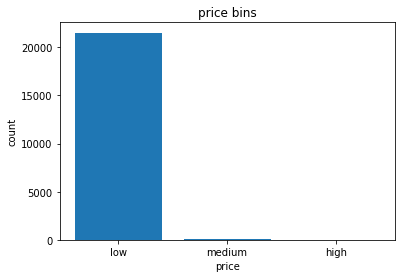

In [10]:
print(df['price-binned'].value_counts().to_frame())
# df['price-binned'].value_counts().plot.bar()
plt.bar(group_names, df['price-binned'].value_counts())

# set x/y labels and plot title
plt.xlabel("price")
plt.ylabel("count")
plt.title("price bins")

(array([1.4956e+04, 5.4130e+03, 8.0200e+02, 2.3900e+02, 1.0500e+02,
        4.4000e+01, 1.8000e+01, 9.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  78000.        ,  586133.33333333, 1094266.66666667,
        1602400.        , 2110533.33333333, 2618666.66666667,
        3126800.        , 3634933.33333333, 4143066.66666667,
        4651200.        , 5159333.33333333, 5667466.66666667,
        6175600.        , 6683733.33333333, 7191866.66666667,
        7700000.        ]),
 <BarContainer object of 15 artists>)

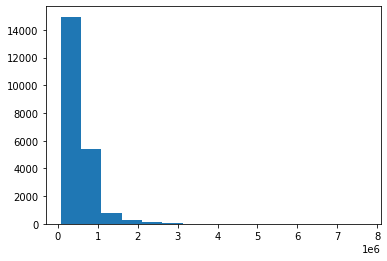

In [11]:
# draw historgram of attribute "price" with bins = 15
plt.hist(df["price"], bins = 15)

## Create Dummy Variable

In [12]:
dummy_variable_1 = pd.get_dummies(df["price-binned"])

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

## Export to csv

In [13]:
df.to_csv('data/kc_house_data.csv')